# Problem Statement

In this case, trainees must create a model for predicting fraudulent transactions for a financial company and then use the model's insights to create an actionable plan. The case data is available in CSV format, including 6362620 rows and 10 columns.

Candidates are free to design their machine learning model in any way they see fit.
The model would be estimated on the calibration data and evaluated on the validation data using standard model development processes. This case necessitates both statistical analysis and creative/judgmental thinking. We propose that you spend time fine-tuning your machine learning model as well as analysing the results.

## Data Dictionary

### Import Libarary's

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Exploratory Data Analysis (EDA)

The goal here is to learn more about the data and become an expert on the dataset you're working with.

In [5]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
df.shape

(6362620, 11)

Check if: columns having missing values

### *Data cleaning including missing values, outliers and multi-collinearity.


In [8]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

[]

In [9]:
# Good No Null Values
df.isnull().sum().max()

0

In [10]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### *Sampling the Data.

In [11]:
df=df.sample(n=1600000, random_state=0)

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

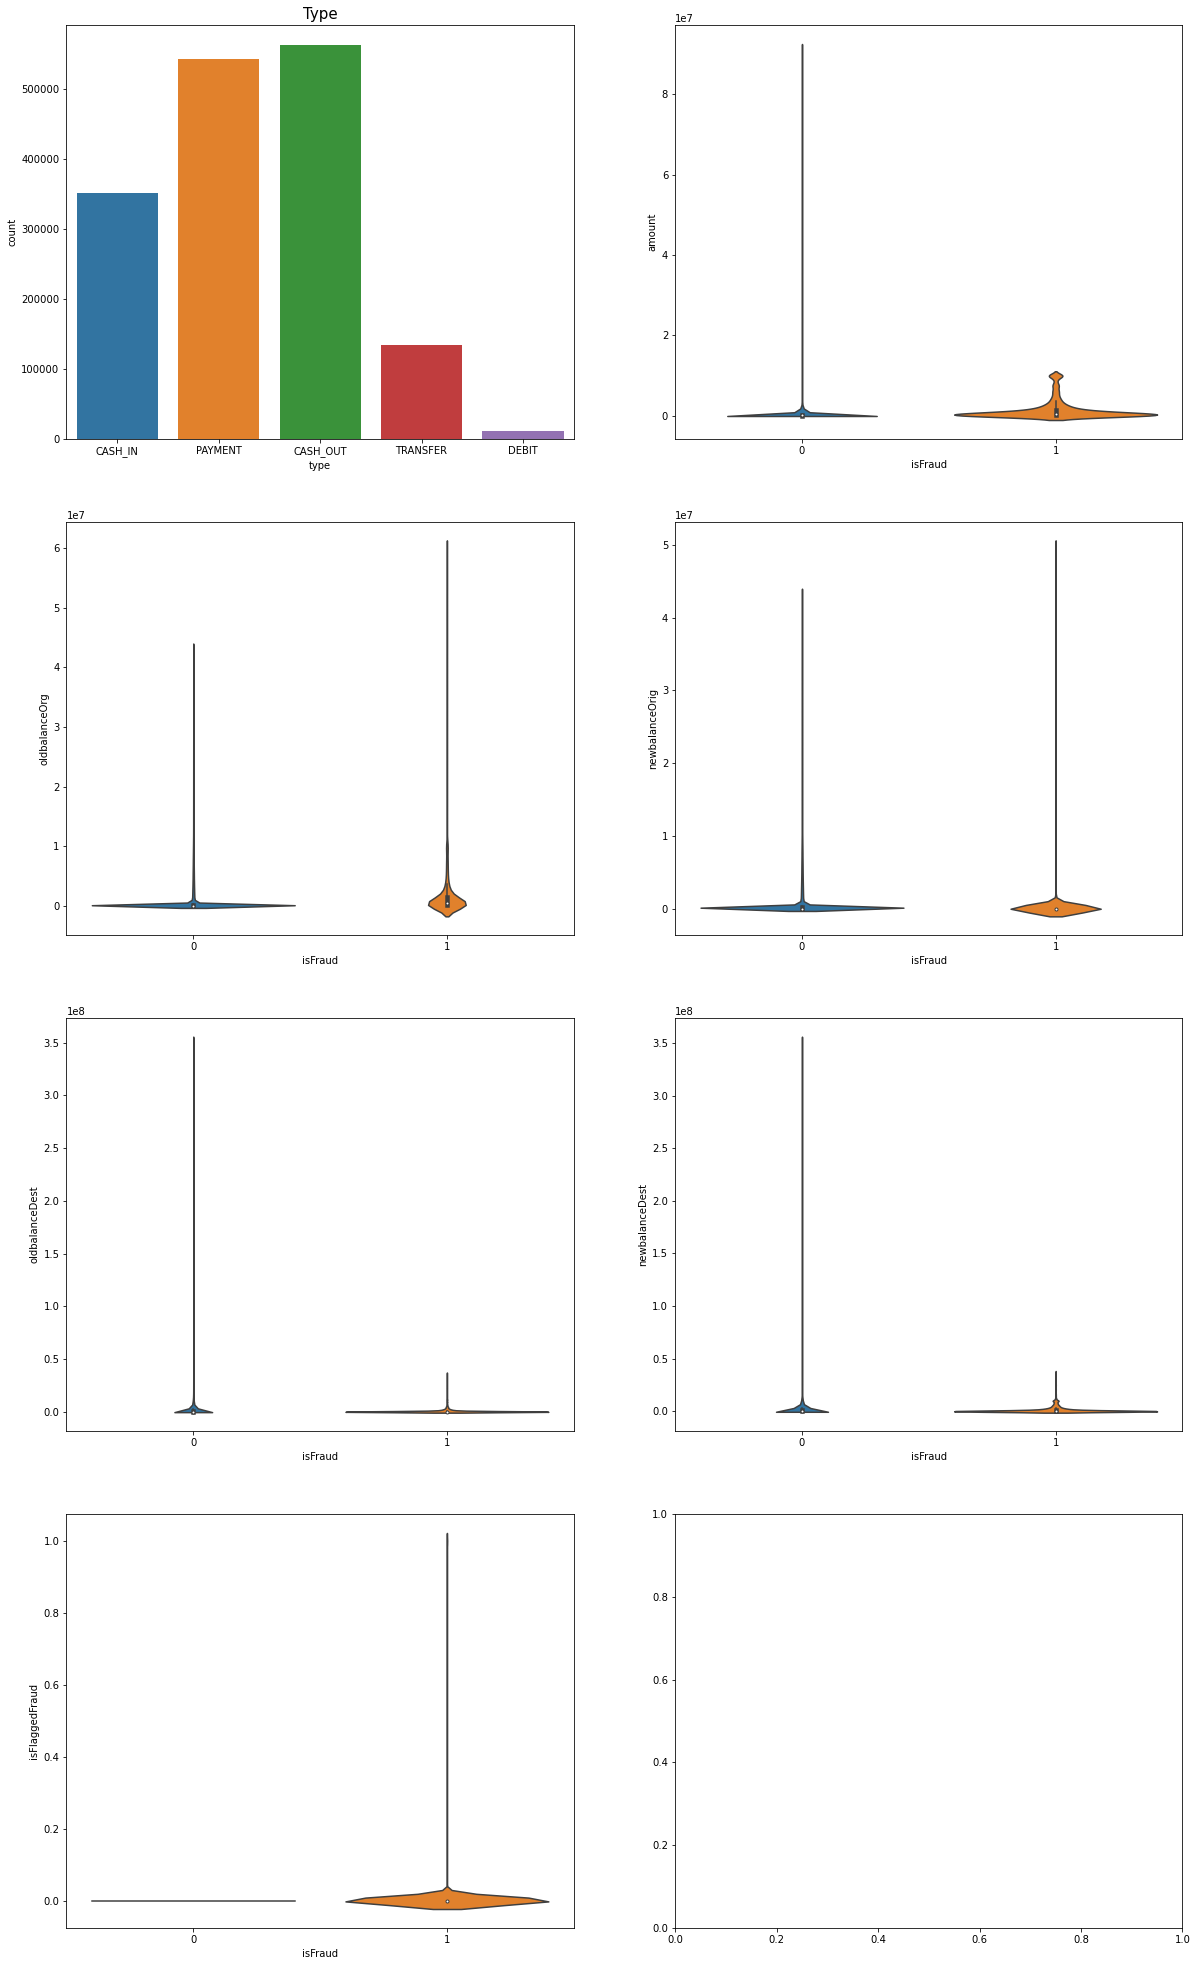

In [12]:
fig,ax=plt.subplots(4,2,figsize=(20,35))

sns.violinplot(x=df.isFraud,y=df['newbalanceDest'],ax=ax[2][1])
sns.violinplot(x=df.isFraud,y=df['isFlaggedFraud'],ax=ax[3][0])
sns.violinplot(x=df.isFraud,y=df['oldbalanceOrg'],ax=ax[1][0])
sns.violinplot(x=df.isFraud,y=df['newbalanceOrig'],ax=ax[1][1])
sns.violinplot(x=df.isFraud,y=df['oldbalanceDest'],ax=ax[2][0])
sns.countplot(x=df.type,ax=ax[0][0]).set_title('Type',size=15)
sns.violinplot(x=df.isFraud,y=df['amount'],ax=ax[0][1])



### *Correlation between the variables with the target variable

In [13]:
df.corr()["isFraud"].sort_values()

newbalanceOrig   -0.007273
oldbalanceDest   -0.006177
newbalanceDest    0.000251
oldbalanceOrg     0.011338
step              0.034063
isFlaggedFraud    0.054172
amount            0.077936
isFraud           1.000000
Name: isFraud, dtype: float64

<AxesSubplot:>

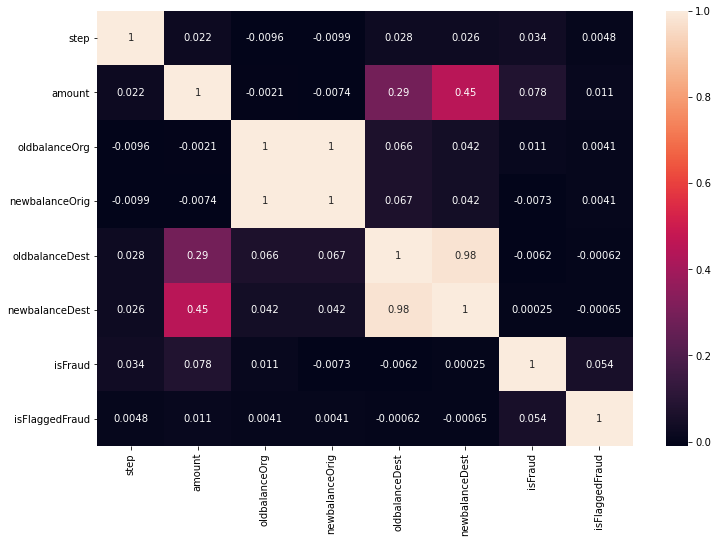

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [15]:
df["isFraud"].value_counts()

0    1597958
1       2042
Name: isFraud, dtype: int64

In [16]:
df["type"].value_counts()

CASH_OUT    562373
PAYMENT     541995
CASH_IN     351153
TRANSFER    134006
DEBIT        10473
Name: type, dtype: int64

### *Key Factor for Detecting Frauds : counting the number of transactions per type

<AxesSubplot:xlabel='type', ylabel='count'>

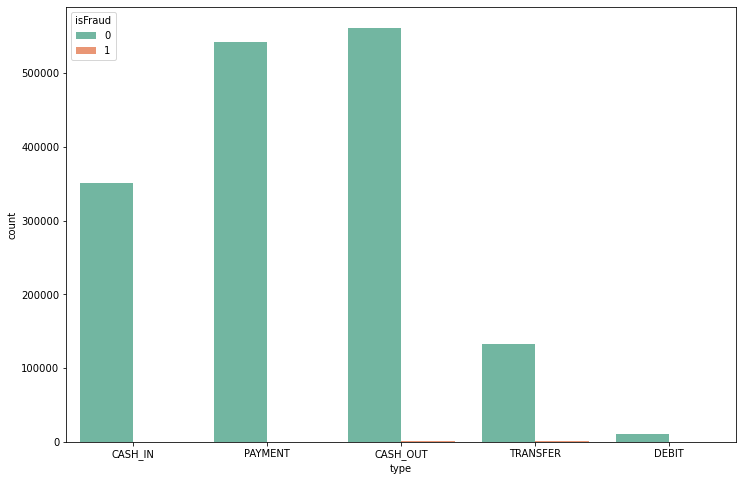

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")

In [18]:
#sns.pairplot(df)

#Transfer & Cash_out type data detecting fraud 

In [19]:
df["step"].value_counts().sort_values(ascending=False).head()

19     12922
18     12295
187    12293
235    11855
163    11676
Name: step, dtype: int64

In [20]:
df.select_dtypes(include=["object"]).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [21]:
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [22]:
Fraud = df[df['isFraud'] == '1']
Valid = df[df['isFraud'] == '0']

### *drop "isFlaggedFraud" variable as we don't required.

In [23]:
df.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [24]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4644207,330,CASH_IN,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,281,PAYMENT,3473.75,0.00,0.00,0.00,0.00,0
4426240,322,CASH_OUT,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,401,TRANSFER,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,180,CASH_IN,234392.25,20882.00,255274.25,0.00,0.00,0


In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["type"] = label.fit_transform(df["type"])

In [26]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4644207,330,0,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0
3800666,281,3,3473.75,0.00,0.00,0.00,0.00,0
4426240,322,1,66170.69,32803.00,0.00,0.00,66170.69,0
5788765,401,4,335384.26,197.00,0.00,5311958.61,5647342.87,0
2010701,180,0,234392.25,20882.00,255274.25,0.00,0.00,0


### *Creating training and test set

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop("isFraud",axis=1)
y = df["isFraud"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### *Data Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
cols = X_train.columns
cols

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_train_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.125337,0.00,0.000030,0.001756,0.002165,0.002186,0.002177
1,0.411051,0.75,0.000104,0.000250,0.000107,0.000000,0.000000
2,0.215633,0.25,0.003088,0.000003,0.000000,0.000378,0.001675
3,0.212938,0.25,0.001884,0.000051,0.000000,0.003486,0.003974
4,0.055256,0.75,0.000015,0.000000,0.000000,0.000000,0.000000


In [31]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)
X_test_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.443396,0.25,0.002998,0.000263,0.000000,0.000000,0.000779
1,0.407008,0.25,0.002702,0.000000,0.000000,0.009455,0.010153
2,0.013477,0.00,0.003686,0.084915,0.108912,0.001184,0.000225
3,0.339623,0.25,0.000609,0.000000,0.000000,0.002203,0.002360
4,0.706199,0.25,0.000509,0.000000,0.000000,0.002718,0.002849


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.4f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.4f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

## 1.Modelling with Logistic Regression

In [33]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr_train_pred = logreg.predict(X_train)
lr_test_pred = logreg.predict(X_test)

print_score(y_train, lr_train_pred, train=True)
print_score(y_test, lr_test_pred, train=False)

Train Result:
Accuracy Score: 99.8093%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.992402e-01     0.304965  0.998093  6.521023e-01  9.983636e-01
recall     9.988501e-01     0.399134  0.998093  6.989919e-01  9.980930e-01
f1-score   9.990451e-01     0.345752  0.998093  6.723985e-01  9.982203e-01
support    1.278384e+06  1616.000000  0.998093  1.280000e+06  1.280000e+06
_______________________________________________
Confusion Matrix: 
 [[1276914    1470]
 [    971     645]]

Test Result:
Accuracy Score: 99.8150%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999230    0.342205   0.99815       0.670718       0.998355
recall          0.998917    0.422535   0.99815       0.710726       0.998150
f1-score        0.999074    0.378151   0.99815       0.688612      

### *Parameters of Logistic Regression

In [35]:
# printing the coefficients
logreg.coef_

array([[-2.82496760e-02, -3.30977510e-04, -1.86282633e-04,
         2.05100489e-04, -2.18099735e-04,  7.42631688e-06,
        -9.09434933e-06]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

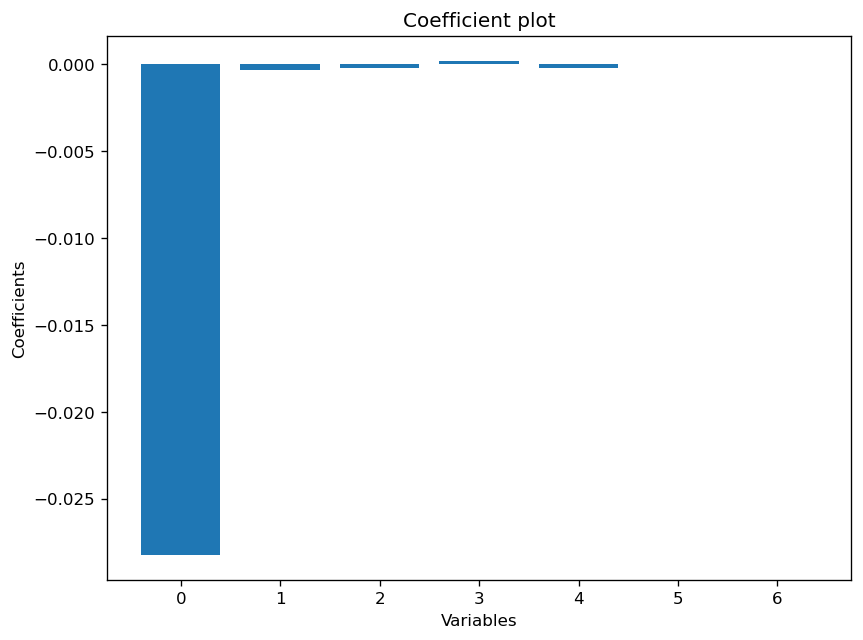

In [36]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [37]:
Coefficients = pd.DataFrame({
    'Variable'    : X_train.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,step,0.028250
1,type,0.000331
2,amount,0.000186
3,oldbalanceOrg,0.000205
4,newbalanceOrig,0.000218


In [38]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [39]:
subset = df[sig_var['Variable'].values]
subset.head()

""
4644207
3800666
4426240
5788765
2010701


## 2.Modelling with XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [40]:
from xgboost import XGBClassifier
from matplotlib import pyplot

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
xgb_train_pred = xgb_clf.predict(X_train)
xgb_test_pred = xgb_clf.predict(X_test)

print_score(y_train, xgb_train_pred, train=True)
print_score(y_test, xgb_test_pred, train=False)

Train Result:
Accuracy Score: 99.9952%
_______________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision  9.999531e-01     0.999358  0.999952  9.996554e-01  9.999523e-01
recall     9.999992e-01     0.962871  0.999952  9.814353e-01  9.999523e-01
f1-score   9.999761e-01     0.980775  0.999952  9.903757e-01  9.999519e-01
support    1.278384e+06  1616.000000  0.999952  1.280000e+06  1.280000e+06
_______________________________________________
Confusion Matrix: 
 [[1278383       1]
 [     60    1556]]

Test Result:
Accuracy Score: 99.9762%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999781    0.983425  0.999762       0.991603       0.999759
recall          0.999981    0.835681  0.999762       0.917831       0.999762
f1-score        0.999881    0.903553  0.999762       0.951717      

In [42]:
print(xgb_clf.feature_importances_)

[0.04157637 0.13238333 0.06621823 0.175375   0.29122764 0.09145971
 0.2017597 ]
